In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from customtkinter import *

In [2]:
df = pd.read_csv('2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
num_cols = df.select_dtypes(include=['float64'])
num_cols.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Pengerjaaan soal no.1

In [7]:
mean_dict = {}
median_dict = {}
mode_dict = {}
range_dict = {}
iqr_dict = {}
variance_dict = {}
std_dict = {}
for col in num_cols.columns:
    mean_col = num_cols[col].mean()
    mean_dict[col] = mean_col

    mode_col = num_cols[col].mode()
    mode_dict[col] = mode_col
    
    median_col = num_cols[col].median()
    median_dict[col] = median_col
    
    max_col = num_cols[col].max()
    min_col = num_cols[col].min()
    range_dict[col] = (max_col-min_col)
    
    q1_col = num_cols[col].quantile(0.25)
    q3_col = num_cols[col].quantile(0.75)
    iqr_dict[col] = q3_col - q1_col
    
    variance_col = num_cols[col].var()
    variance_dict[col] = variance_col
    
    std_col = num_cols[col].std()
    std_dict[col] = std_col
    
    zs = (num_cols[col] - mean_col) / std_col

In [8]:
mean_dict

{'Score': np.float64(5.407096153846155),
 'GDP per capita': np.float64(0.905147435897436),
 'Social support': np.float64(1.2088141025641026),
 'Healthy life expectancy': np.float64(0.7252435897435898),
 'Freedom to make life choices': np.float64(0.39257051282051286),
 'Generosity': np.float64(0.18484615384615383),
 'Perceptions of corruption': np.float64(0.11060256410256411)}

In [9]:
median_dict

{'Score': np.float64(5.3795),
 'GDP per capita': np.float64(0.96),
 'Social support': np.float64(1.2715),
 'Healthy life expectancy': np.float64(0.789),
 'Freedom to make life choices': np.float64(0.417),
 'Generosity': np.float64(0.1775),
 'Perceptions of corruption': np.float64(0.08549999999999999)}

In [10]:
mode_dict

{'Score': 0    5.208
 Name: Score, dtype: float64,
 'GDP per capita': 0    0.96
 Name: GDP per capita, dtype: float64,
 'Social support': 0    1.465
 Name: Social support, dtype: float64,
 'Healthy life expectancy': 0    0.815
 1    0.999
 Name: Healthy life expectancy, dtype: float64,
 'Freedom to make life choices': 0    0.498
 1    0.508
 2    0.557
 Name: Freedom to make life choices, dtype: float64,
 'Generosity': 0    0.153
 Name: Generosity, dtype: float64,
 'Perceptions of corruption': 0    0.028
 1    0.078
 2    0.089
 Name: Perceptions of corruption, dtype: float64}

In [11]:
range_dict

{'Score': np.float64(4.916),
 'GDP per capita': np.float64(1.684),
 'Social support': np.float64(1.624),
 'Healthy life expectancy': np.float64(1.141),
 'Freedom to make life choices': np.float64(0.631),
 'Generosity': np.float64(0.566),
 'Perceptions of corruption': np.float64(0.453)}

In [12]:
variance_dict

{'Score': np.float64(1.2390358423076921),
 'GDP per capita': np.float64(0.15871416521918943),
 'Social support': np.float64(0.08951549425144747),
 'Healthy life expectancy': np.float64(0.058624030603804805),
 'Freedom to make life choices': np.float64(0.020531872415219192),
 'Generosity': np.float64(0.009073408436724564),
 'Perceptions of corruption': np.float64(0.008937402315963607)}

In [13]:
std_dict

{'Score': np.float64(1.1131198687956712),
 'GDP per capita': np.float64(0.39838946424220284),
 'Social support': np.float64(0.29919140069769296),
 'Healthy life expectancy': np.float64(0.24212399840537246),
 'Freedom to make life choices': np.float64(0.1432894707060473),
 'Generosity': np.float64(0.09525444050922018),
 'Perceptions of corruption': np.float64(0.09453783536745279)}

In [14]:
zs

0      2.987137
1      3.166959
2      2.437092
3      0.078248
4      1.982248
         ...   
151    3.177537
152    0.385004
153   -0.905485
154   -0.799707
155   -0.207352
Name: Perceptions of corruption, Length: 156, dtype: float64

### pengerjaan soal no.2

In [15]:
for col in num_cols:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_iqr = num_cols.loc[(num_cols[col] < lower) | (num_cols[col] > upper), col]
    
    zs_threshold = 2.5
    outlier_zs = []
    for idx, val in enumerate(num_cols[col]):
        z = (val - num_cols[col].mean()) / num_cols[col].std()
        if abs(z) > zs_threshold:
            outlier_zs.append(idx)

In [16]:
outlier_iqr

0      0.393
1      0.410
2      0.341
4      0.298
5      0.343
6      0.373
7      0.380
8      0.308
10     0.290
13     0.316
15     0.310
33     0.453
75     0.287
151    0.411
Name: Perceptions of corruption, dtype: float64

In [17]:
outlier_zs

[0, 1, 6, 7, 33, 151]

### pengerjaan soal no.3

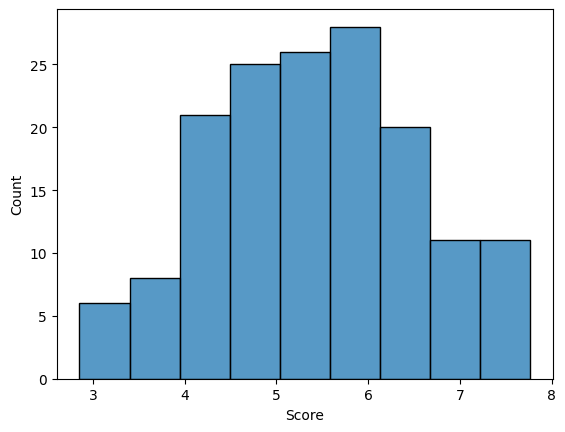

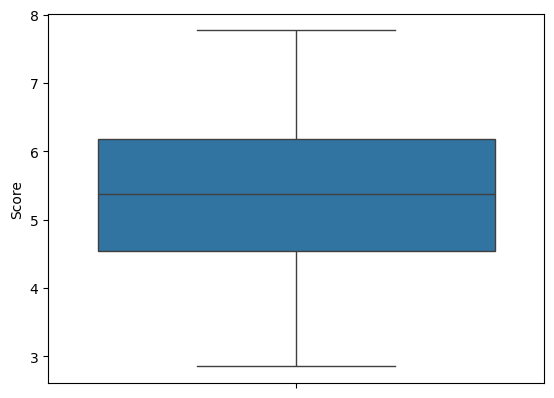

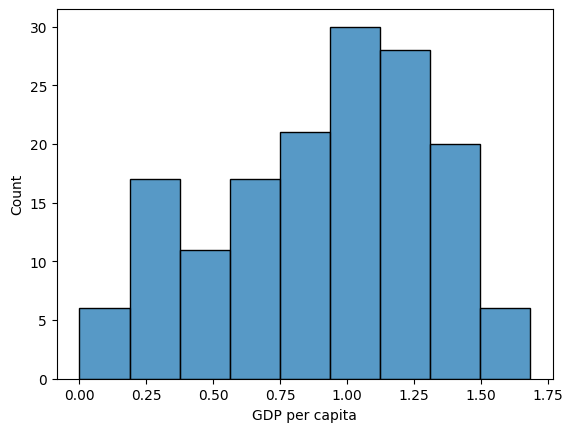

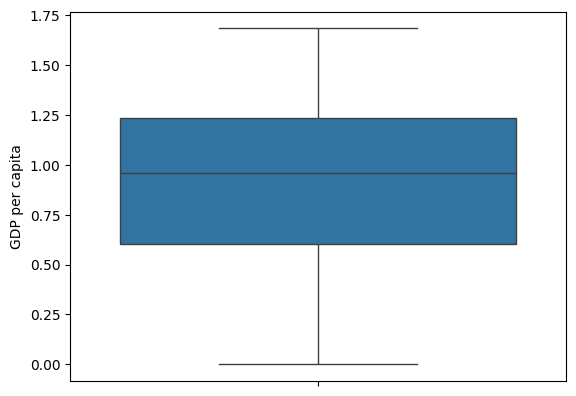

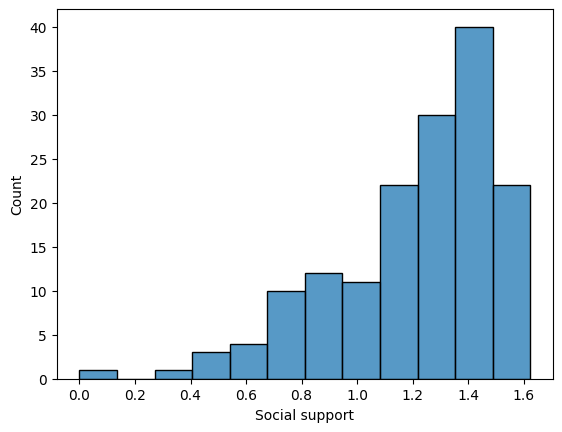

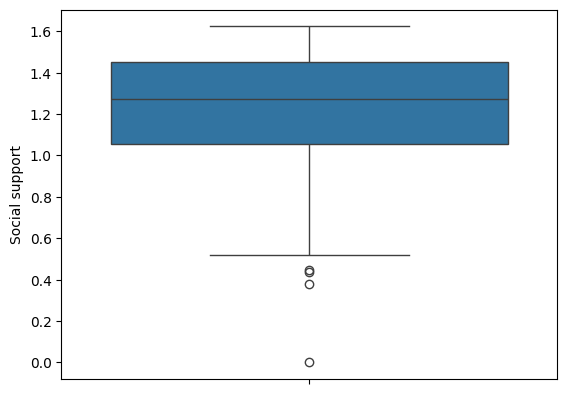

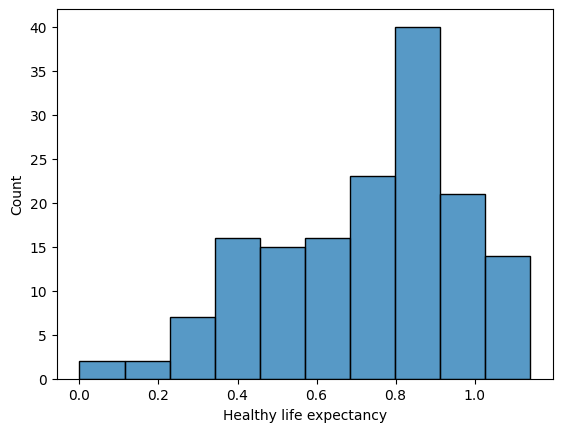

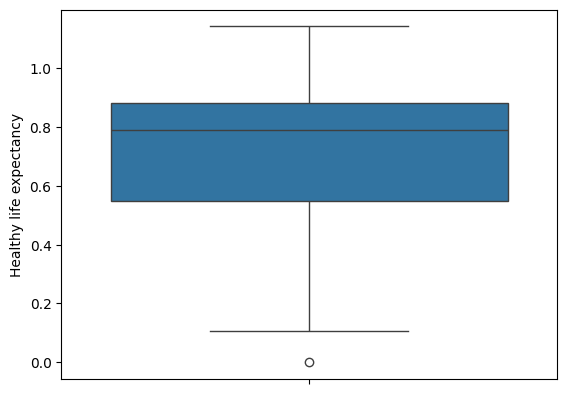

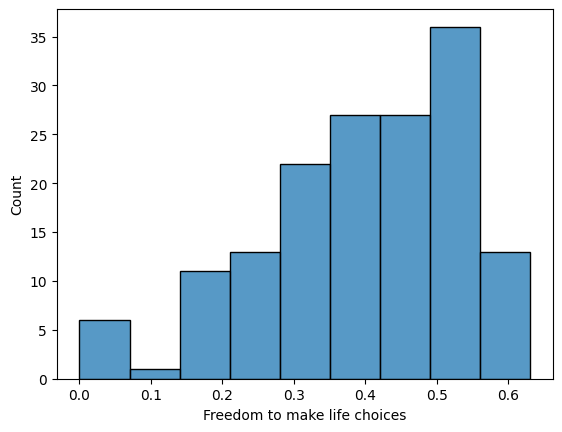

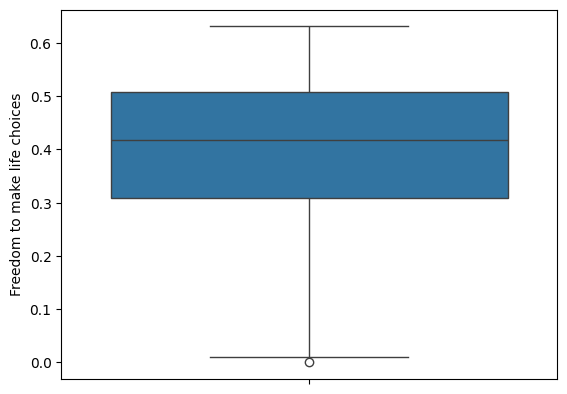

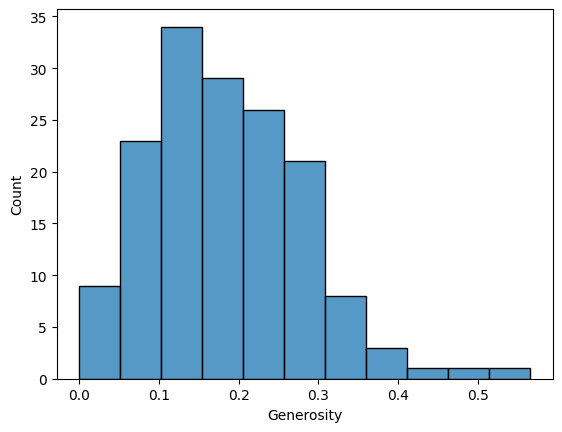

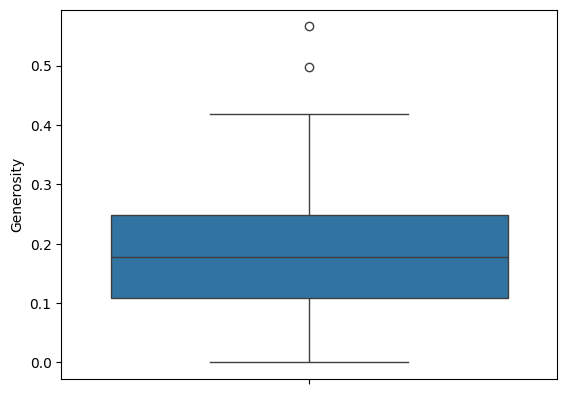

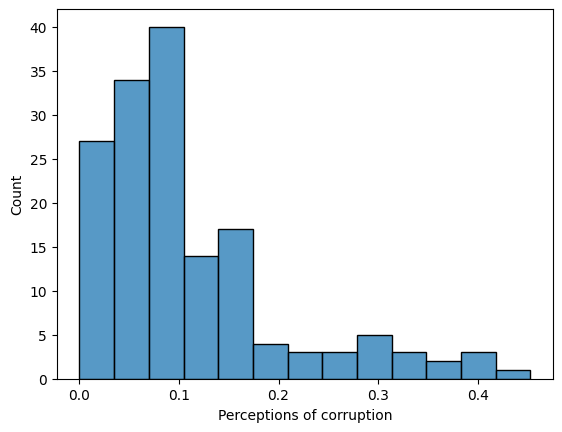

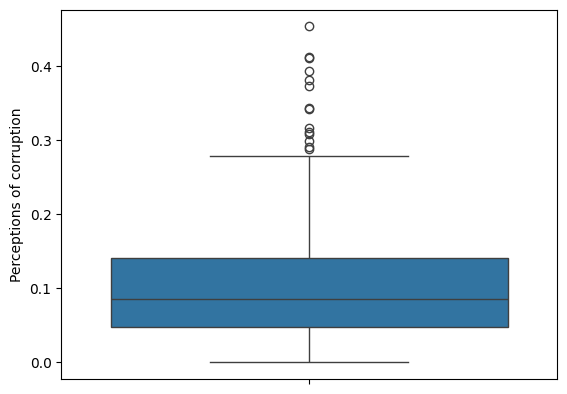

In [18]:
for col in num_cols.columns:
    sns.histplot(num_cols[col])
    plt.show()
    sns.boxplot(num_cols[col])
    plt.show()

### pengerjaan soal no.4

In [19]:
cov_dict = {}
for col in num_cols.columns:
    covariance = np.cov(np.array([num_cols[col], num_cols['Score']]))
    cov_dict[col] = covariance

In [20]:
print(cov_dict) # GDP Per Capita

{'Score': array([[1.23903584, 1.23903584],
       [1.23903584, 1.23903584]]), 'GDP per capita': array([[0.15871417, 0.35205151],
       [0.35205151, 1.23903584]]), 'Social support': array([[0.08951549, 0.25878813],
       [0.25878813, 1.23903584]]), 'Healthy life expectancy': array([[0.05862403, 0.21018867],
       [0.21018867, 1.23903584]]), 'Freedom to make life choices': array([[0.02053187, 0.09039439],
       [0.09039439, 1.23903584]]), 'Generosity': array([[0.00907341, 0.00803956],
       [0.00803956, 1.23903584]]), 'Perceptions of corruption': array([[0.0089374 , 0.04057881],
       [0.04057881, 1.23903584]])}


### pengerjaan soal no.5

In [21]:
top_10 = df.iloc[:10,:]
top_10

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


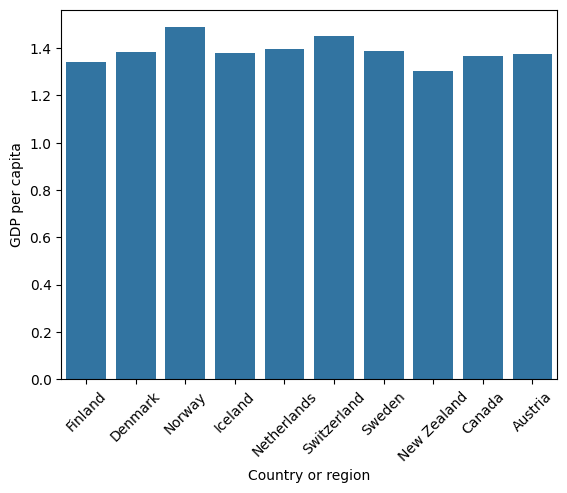

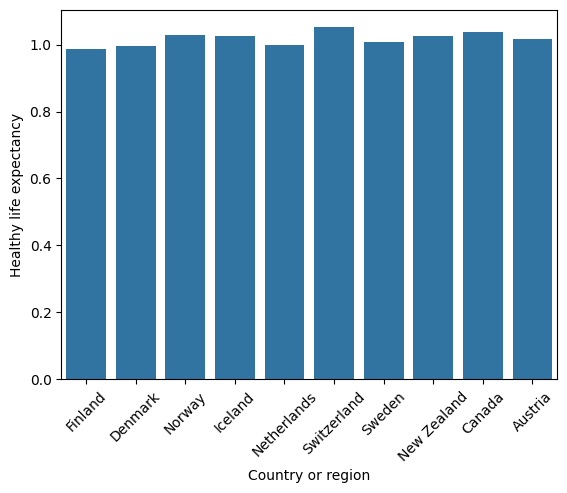

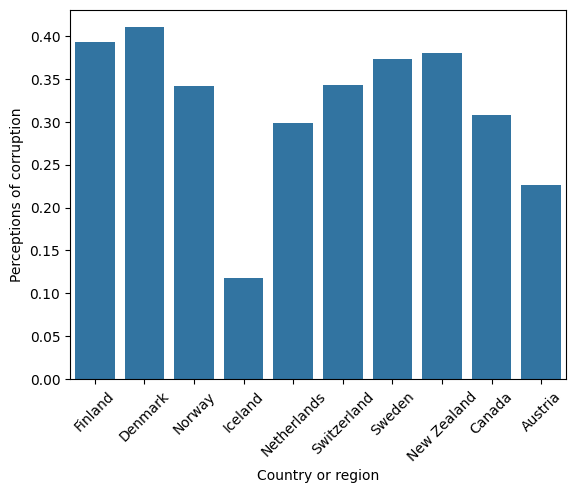

In [22]:
sns.barplot(x=top_10['Country or region'], y=top_10['GDP per capita'])
plt.xticks(rotation=45)
plt.show()
sns.barplot(x=top_10['Country or region'], y=top_10['Healthy life expectancy'])
plt.xticks(rotation=45)
plt.show()
sns.barplot(x=top_10['Country or region'], y=top_10['Perceptions of corruption'])
plt.xticks(rotation=45)
plt.show()

## Preprocessing for AI

In [23]:
df.drop(columns='Overall rank',inplace=True)

In [24]:
dfc = df.copy(deep=True)

In [25]:
# unique = df['Country or region'].unique()
# mappings = {value : idx for idx,value in enumerate(unique)}
# df['Country or region'] = df['Country or region'].map(mappings)

In [26]:
dfc.drop(columns='Country or region', inplace=True)

In [27]:
dfc.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


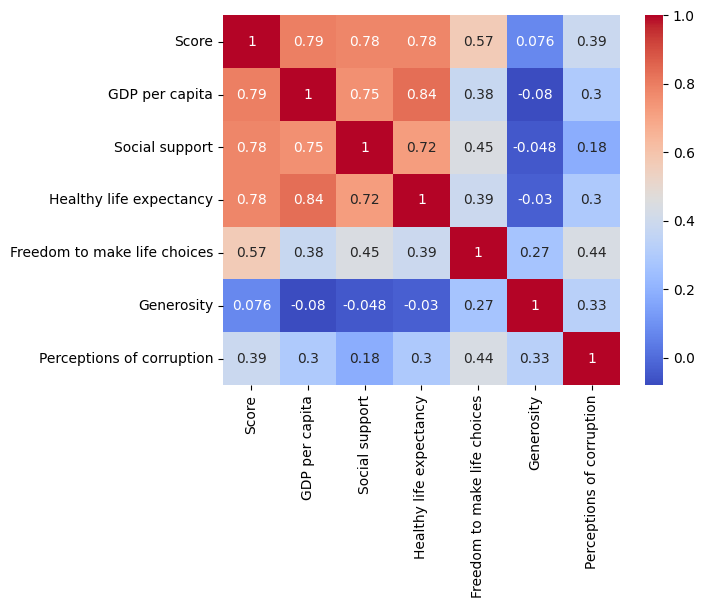

In [28]:
sns.heatmap(dfc.corr(),annot=True,cmap='coolwarm')
plt.show()

In [29]:
dfc.drop(columns=['Generosity', 'Perceptions of corruption', 'Freedom to make life choices'], inplace=True)

In [30]:
for col in dfc:
    q1 = dfc[col].quantile(0.25)
    q3 = dfc[col].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    dfc.loc[(dfc[col] < lower) | (dfc[col] > upper), col] = dfc[col].median() 

In [31]:
dfc

,Score,GDP per capita,Social support,Healthy life expectancy
0,7.769,1.340,1.5870,0.986
1,7.600,1.383,1.5730,0.996
2,7.554,1.488,1.5820,1.028
3,7.494,1.380,1.6240,1.026
4,7.488,1.396,1.5220,0.999
...,...,...,...,...
151,3.334,0.359,0.7110,0.614
152,3.231,0.476,0.8850,0.499
153,3.203,0.350,0.5170,0.361
154,3.083,0.026,1.2715,0.105


In [32]:
def minmaxscaler(df):
    min = df.min()
    max = df.max()
    norm = (df-min) / (max-min)
    return norm, min, max

In [33]:
dfc_norm, min, max = minmaxscaler(dfc)

In [34]:
type(dfc_norm)

pandas.core.frame.DataFrame

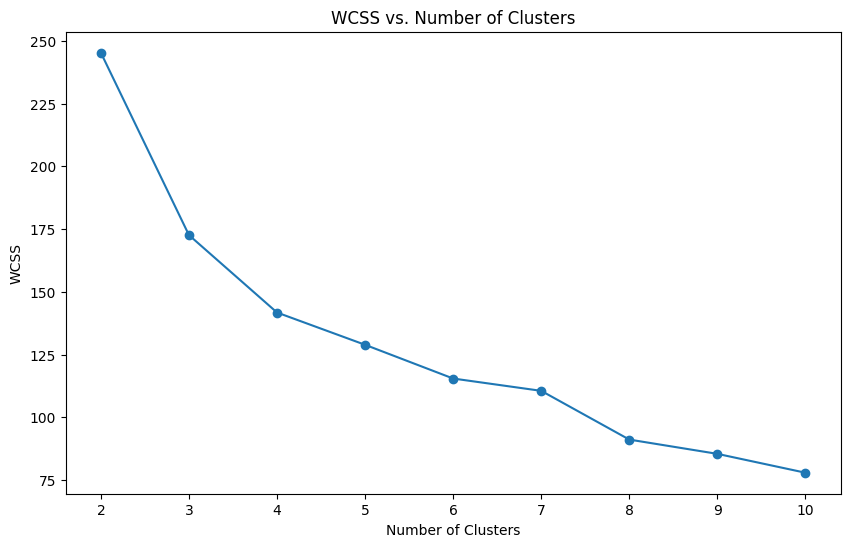

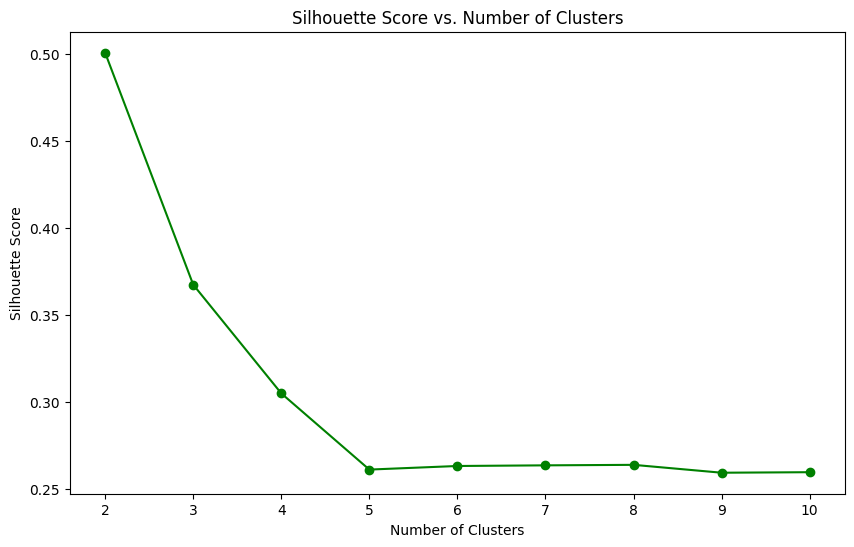

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = dfc_norm

# Standardize the features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 1. Apply KMeans and calculate WCSS for different K values
wcss = []
silhouette_scores = []

# You can test clustering for a range of K (e.g., from 2 to 10)
for k in range(2, 11):  # K between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    
    # Calculate WCSS (inertia)
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score (if k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

# 2. Plot WCSS to find the optimal K
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 3. Plot Silhouette Scores to find the optimal K
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
